##Import Library dan Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6 
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
data = pd.read_csv("TLKM.JK.csv")

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


##Explorasi Data

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# menghitung persentase nilai-nilai null (missing values) dalam setiap kolom pada suatu dataset data
data.isnull().sum()/len(data)

Date         0.000000
Open         0.000703
High         0.000703
Low          0.000703
Close        0.000703
Adj Close    0.000703
Volume       0.000703
dtype: float64

In [ ]:
# untuk menghapus beberapa kolom pada dataset data
data = data.drop(['Open','Low','Close','Adj Close','Volume'],axis='columns')

In [ ]:
print(data.dtypes)

Date     object
High    float64
dtype: object


In [ ]:
data

,Date,High
0,2017-01-02,3980.0
1,2017-01-03,3990.0
2,2017-01-04,3980.0
3,2017-01-05,4030.0
4,2017-01-06,4010.0
...,...,...
1417,2022-08-26,4540.0
1418,2022-08-29,4550.0
1419,2022-08-30,4620.0
1420,2022-08-31,4600.0


In [ ]:
#Mengubah tanggal menjadi index
con = data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1422, freq=None)

In [ ]:
data

,High
Date,
2017-01-02,3980.0
2017-01-03,3990.0
2017-01-04,3980.0
2017-01-05,4030.0
2017-01-06,4010.0
...,...
2022-08-26,4540.0
2022-08-29,4550.0
2022-08-30,4620.0


In [ ]:
#Menginisialkan variabel High sebagai data time series
ts = data['High']
ts.head(10)

Date
2017-01-02    3980.0
2017-01-03    3990.0
2017-01-04    3980.0
2017-01-05    4030.0
2017-01-06    4010.0
2017-01-09    4030.0
2017-01-10    4030.0
2017-01-11    4000.0
2017-01-12    3970.0
2017-01-13    3970.0
Name: High, dtype: float64

In [ ]:
#untuk menghapus baris yang memiliki nilai null pada dataset data dan menyimpan DataFrame yang baru dalam variabel ts.
ts = data - ts.shift()
ts = data.dropna()

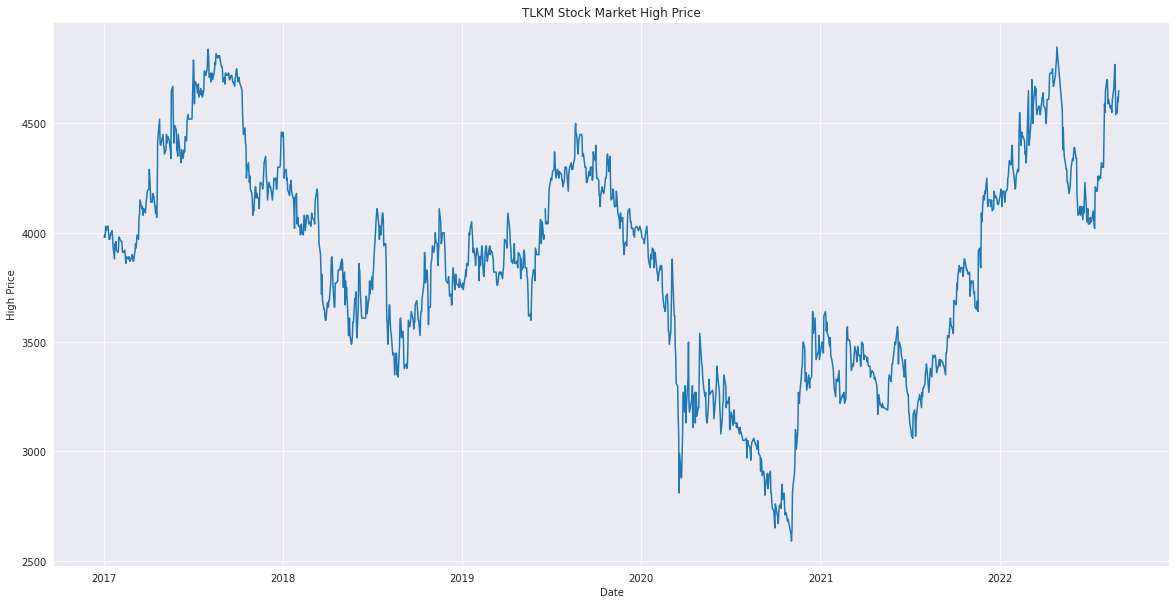

In [ ]:
#Visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('TLKM Stock Market High Price')
plt.plot(data['High'])

In [ ]:
#Deklarasi fungsi untuk mengecek stasioneritas data
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=20).mean()
    rolstd = timeseries.rolling(window=20).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

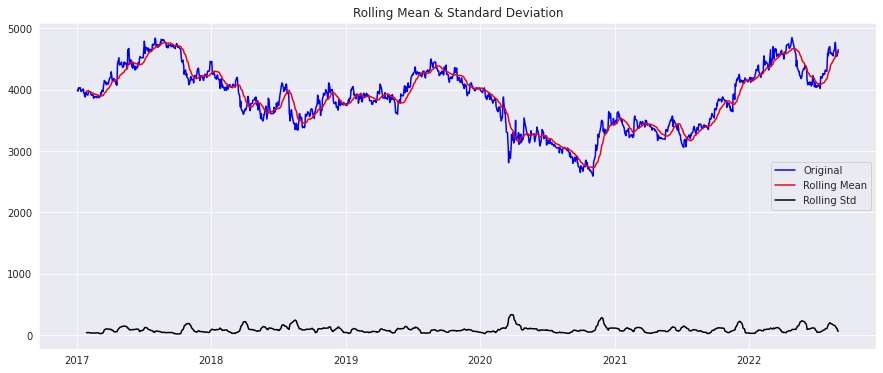

Results of Dickey-Fuller Test:
Test Statistic                   -1.775556
p-value                           0.392663
#Lags Used                        2.000000
Number of Observations Used    1418.000000
Critical Value (1%)              -3.434970
Critical Value (5%)              -2.863580
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
#  untuk melakukan uji stasioneritas (stationarity test) pada suatu time series data
test_stationarity(ts)

##Uji Hipotesis :

H0 : Data tidak stasioner

Ha : Data stasioner

Tolak H0 apabila diperoleh p-value < alpha (0,05)

Diperoleh nilai p-value 0.39 > 0,05, maka H0 tidak ditolak.

Jadi, data memiliki keadaan yang tidak stasioner.

Karena data belum stasioner, sehingga perlu dilakukan proses stasionerisasi data, yakni dengan proses differencing untuk memperoleh data yang stasioner.

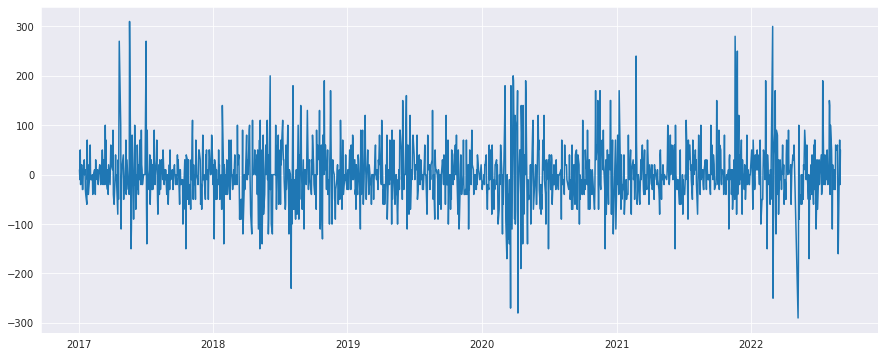

In [ ]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

Kode ts_diff_1 = ts - ts.shift() digunakan untuk melakukan first order difference pada time series data yang disimpan pada variabel ts, yaitu mengurangi setiap nilai time series dengan nilai pada lag sebelumnya. Hal ini dilakukan untuk membuat time series data menjadi lebih stasioner (stationary) dengan menghilangkan trend atau pola yang mungkin ada pada data.

Kode ts_diff_1 = ts_diff_1.dropna() digunakan untuk menghapus nilai null yang muncul sebagai hasil dari first order difference.

Kode plt.plot(ts_diff_1) digunakan untuk memvisualisasikan time series data yang telah mengalami first order difference. Dalam plot ini, sumbu x menunjukkan waktu, sedangkan sumbu y menunjukkan nilai time series data setelah mengalami first order difference.

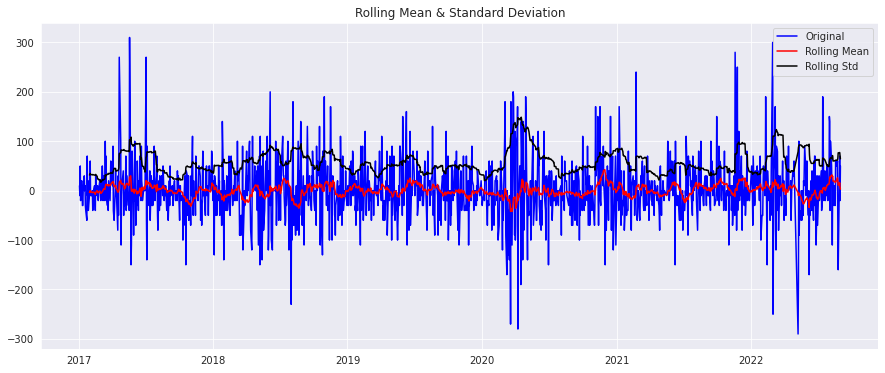

Results of Dickey-Fuller Test:
Test Statistic                  -29.891562
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1418.000000
Critical Value (1%)              -3.434970
Critical Value (5%)              -2.863580
Critical Value (10%)             -2.567856
dtype: float64


In [ ]:
test_stationarity(ts_diff_1)

Diperoleh nilai p-value 0.00 > 0,05, maka H0 ditolak.

Jadi, data memiliki keadaan yang sudah stasioner.

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


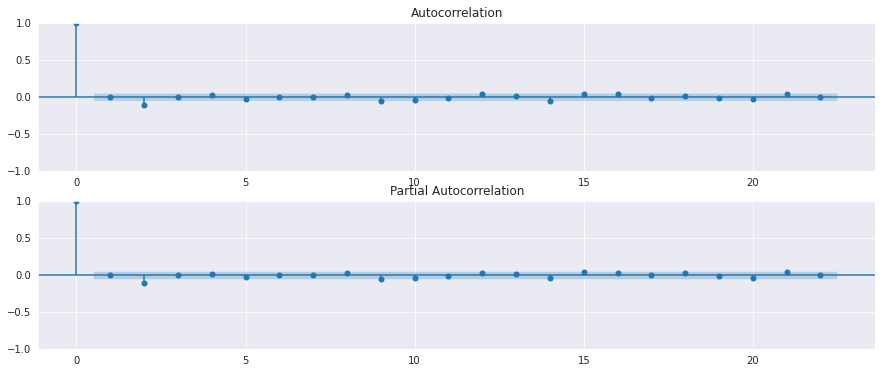

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=22)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=22)
plt.show()

Kode di atas digunakan untuk menghasilkan plot Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF) dari time series data yang telah mengalami first order difference (ts_diff_1).

Fungsi plot_acf() dan plot_pacf() dari modul statsmodels.graphics.tsaplots digunakan untuk menghasilkan plot ACF dan PACF secara berurutan. Pada plot ACF, sumbu x menunjukkan lag (waktu), sedangkan sumbu y menunjukkan nilai korelasi antara time series dengan time series yang telah di-shift sebanyak lag kali. Pada plot PACF, sumbu x juga menunjukkan lag (waktu), sedangkan sumbu y menunjukkan nilai korelasi antara time series dengan time series yang telah di-shift sebanyak lag kali, tetapi dengan efek dari korelasi pada lag-lag sebelumnya sudah diperhitungkan.

Plot ACF dan PACF digunakan untuk memeriksa pola korelasi pada time series data dan menentukan parameter AR (Autoregressive) dan MA (Moving Average) pada model ARIMA (Autoregressive Integrated Moving Average) yang akan digunakan pada analisis selanjutnya. 

In [ ]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

Fungsi evaluate_arima_model() digunakan untuk mengevaluasi performa model ARIMA dengan satu set parameter arima_order. Fungsi ini mengambil data time series X dan parameter model ARIMA arima_order, dan mengembalikan nilai Root Mean Squared Error (RMSE) dari model yang dihasilkan.

Pertama-tama, fungsi mengubah tipe data X menjadi float32, kemudian membagi data menjadi dua bagian, yaitu data training (70%) dan data test (30%). Selanjutnya, fungsi melakukan iterasi sebanyak panjang data test dan membangun model ARIMA pada data training dengan parameter arima_order. Setiap kali iterasi, fungsi memprediksi nilai pada waktu berikutnya menggunakan model_fit.forecast()[0], kemudian menambahkan nilai aktual pada waktu berikutnya ke dalam data training. Akhirnya, fungsi menghitung RMSE antara nilai prediksi dan nilai aktual pada data test.

Fungsi evaluate_models() digunakan untuk mengevaluasi performa model ARIMA dengan berbagai kombinasi parameter p, d, dan q. Fungsi ini mengambil data time series dataset dan daftar nilai untuk setiap parameter p, d, dan q. Fungsi ini melakukan iterasi untuk setiap kombinasi nilai p, d, dan q dan memanggil fungsi evaluate_arima_model() untuk mengevaluasi performa model ARIMA. Fungsi ini mencatat nilai RMSE untuk setiap model dan mencetak nilai RMSE dan parameter model untuk model dengan RMSE terbaik.



In [ ]:
#untuk mengevaluasi performa model ARIMA dengan berbagai kombinasi nilai p, d, dan q menggunakan fungsi evaluate_models()

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=497.556
ARIMA(0, 0, 1) RMSE=269.975
ARIMA(0, 0, 2) RMSE=173.330
ARIMA(0, 0, 3) RMSE=163.300
ARIMA(0, 1, 0) RMSE=61.292
ARIMA(0, 1, 1) RMSE=61.394
ARIMA(0, 1, 2) RMSE=60.658
ARIMA(0, 1, 3) RMSE=60.770
ARIMA(1, 0, 0) RMSE=61.299
ARIMA(1, 0, 1) RMSE=61.405
ARIMA(1, 0, 2) RMSE=60.694
ARIMA(1, 0, 3) RMSE=60.805
ARIMA(1, 1, 0) RMSE=61.373
ARIMA(1, 1, 1) RMSE=61.600
ARIMA(1, 1, 2) RMSE=60.781
ARIMA(1, 1, 3) RMSE=60.681
ARIMA(2, 0, 0) RMSE=61.383
ARIMA(2, 0, 1) RMSE=61.277
ARIMA(2, 0, 2) RMSE=60.803
ARIMA(2, 0, 3) RMSE=60.747
ARIMA(2, 1, 0) RMSE=60.609
ARIMA(2, 1, 1) RMSE=60.742
ARIMA(2, 1, 2) RMSE=60.779
ARIMA(2, 1, 3) RMSE=60.733
ARIMA(3, 0, 0) RMSE=60.656
ARIMA(3, 0, 1) RMSE=60.761
ARIMA(3, 0, 2) RMSE=60.771
ARIMA(3, 0, 3) RMSE=60.760
ARIMA(3, 1, 0) RMSE=60.712
ARIMA(3, 1, 1) RMSE=60.754
ARIMA(3, 1, 2) RMSE=60.782
ARIMA(3, 1, 3) RMSE=60.968
Best ARIMA(2, 1, 0) RMSE=60.609


Analisis ARIMA (Autoregressive Integrated Moving Average) digunakan untuk memodelkan data deret waktu (time series) dengan memperhitungkan tiga faktor yaitu: autoregression (AR), moving average (MA), dan integrasi (I). Autoregression adalah metode yang menggunakan data masa lalu untuk memprediksi nilai di masa depan. Moving average mengambil rata-rata dari nilai di masa lalu untuk memprediksi nilai di masa depan. Integrasi digunakan untuk menghilangkan fluktuasi dan tren dalam data.

Dalam analisis ARIMA, kita mencari kombinasi dari nilai-nilai p, d, dan q yang memberikan nilai RMSE (Root Mean Squared Error) terbaik untuk memodelkan data deret waktu. Nilai p menunjukkan jumlah lag yang digunakan dalam model autoregressive, nilai d menunjukkan jumlah kali integrasi yang dilakukan pada data, dan nilai q menunjukkan jumlah lag yang digunakan dalam model moving average.

Hasil evaluasi menunjukkan bahwa model ARIMA (2,1,0) memberikan nilai RMSE terbaik yaitu 60.609. Nilai ini menunjukkan bahwa model tersebut memberikan prediksi terbaik dibandingkan dengan model-model ARIMA lainnya dengan kombinasi nilai p, d, dan q yang berbeda.

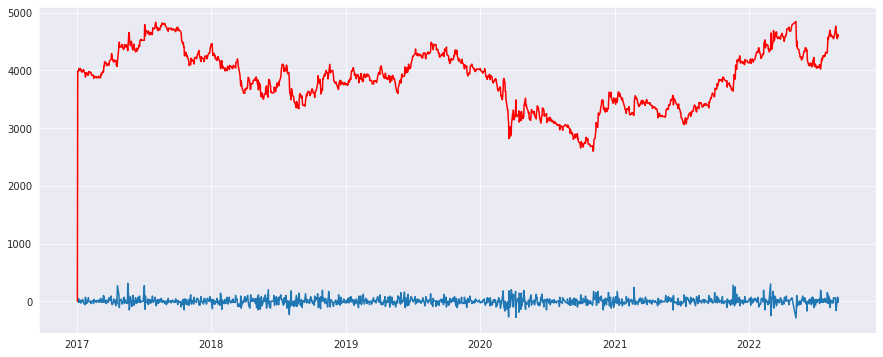

In [ ]:
#Visualisasi perbandingan antara dataset setelah differencing dengan data hasil prediksi ARIMA(2,1,0)
model_ARIMA = ARIMA(ts, order=(2,1,0))
results_ARIMA = model_ARIMA.fit()
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_diff_1)             
plt.plot(predictions_ARIMA, color='red')  

In [ ]:
#Informasi yang diperoleh dari pemodelan ARIMA(2,1,0) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 1421
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -7821.421
Date:                Fri, 17 Mar 2023   AIC                          15648.843
Time:                        06:15:10   BIC                          15664.618
Sample:                             0   HQIC                         15654.736
                               - 1421                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0022      0.019      0.117      0.907      -0.035       0.039
ar.L2         -0.1171      0.021     -5.449      0.000      -0.159      -0.075
sigma2      3567.3015     79.839     44.681      0.000    3410.819    3723.784
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               813.87
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             0.37
Prob(H) (two-sided):                  0.49   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ts


,High
Date,
2017-01-02,3980.0
2017-01-03,3990.0
2017-01-04,3980.0
2017-01-05,4030.0
2017-01-06,4010.0
...,...
2022-08-26,4540.0
2022-08-29,4550.0
2022-08-30,4620.0


In [ ]:
#Prediksi data dengan model ARIMA(2,1,0) untuk 9 hari ke depan
predict_dif = results_ARIMA.predict(start=1421,end=1430)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [len(ts) -1]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict)

1421      6072.452899
1422     15371.508859
1423     29316.867671
1424     47909.213717
1425     71148.583670
1426     99034.897466
1427    131568.150633
1428    168748.352536
1429    210575.503722
1430    257049.603094
dtype: float64


Diperoleh hasil prediksi untuk nilai harga tertinggi saham TLKM pada periode tanggal :

- 01 September 2022 = 6072.452899
- 02 September 2022 = 15371.508859
- 03 September 2022 = 29316.867671
- 04 September 2022 = 47909.213717
- 05 September 2022 = 71148.583670
- 06 September 2022 = 131568.150633
- 07 September 2022 = 68748.352536
- 08 September 2022 = 210575.503722
- 09 September 2022 = 257049.603094